In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7714, 0.2391],
        [0.3921, 0.5465]]) 



In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5523, 0.2456, 0.6148],
        [0.1172, 0.9005, 0.7096]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [7]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [8]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [51]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.],
        [6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6.]])


In [53]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.]]) 

tensor * tensor 
 tensor([[36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.],
        [36., 25., 36., 36.]])


In [11]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [12]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [13]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [14]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

/home/pedro/anaconda3/envs/dc_claas/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/pedro/anaconda3/envs/dc_claas/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
prediction = model(data) # forward pass

In [19]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [20]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optim.step() #gradient descent

In [21]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [22]:
Q = 3*a**3 - b**2

In [23]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [24]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [25]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [26]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

/home/pedro/anaconda3/envs/dc_claas/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/pedro/anaconda3/envs/dc_claas/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
model.fc = nn.Linear(512, 10)

In [28]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


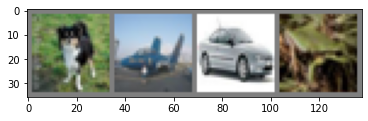

dog   plane car   frog 


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [34]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [35]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [36]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.205
[1,  4000] loss: 1.829
[1,  6000] loss: 1.653
[1,  8000] loss: 1.553
[1, 10000] loss: 1.498
[1, 12000] loss: 1.439
[2,  2000] loss: 1.378
[2,  4000] loss: 1.346
[2,  6000] loss: 1.332
[2,  8000] loss: 1.288
[2, 10000] loss: 1.268
[2, 12000] loss: 1.259
Finished Training


In [78]:
outputs, labels

(tensor([[-3.2449, -4.4447,  2.4752,  2.7721,  3.4399,  3.1290,  3.9231, -1.5670,
          -4.6945, -4.4737],
         [-1.7355, -4.6169,  1.7843,  2.5718,  0.4087,  5.2369, -0.7333,  2.7441,
          -4.2025, -2.8979],
         [ 1.3939,  0.8210,  0.7912, -1.2421,  4.6813, -0.5556,  0.3719, -0.7290,
          -3.7575, -2.3866],
         [-2.3426, -3.9310,  0.5098, -0.5848,  5.1287,  2.0199, -1.2244,  6.3447,
          -6.9732, -3.2340]], grad_fn=<AddmmBackward0>),
 tensor([3, 5, 1, 7]))

In [37]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

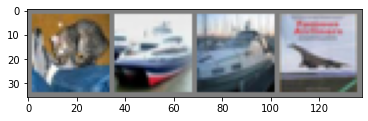

GroundTruth:  cat   ship  ship  plane


In [39]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [40]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [80]:
torch.max(outputs,1)

torch.return_types.max(
values=tensor([3.9231, 5.2369, 4.6813, 6.3447], grad_fn=<MaxBackward0>),
indices=tensor([6, 5, 4, 7]))

In [41]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  horse ship  cat   bird 


In [42]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [43]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 58.8 %
Accuracy for class: car   is 65.0 %
Accuracy for class: bird  is 46.2 %
Accuracy for class: cat   is 21.1 %
Accuracy for class: deer  is 62.0 %
Accuracy for class: dog   is 62.1 %
Accuracy for class: frog  is 70.5 %
Accuracy for class: horse is 47.9 %
Accuracy for class: ship  is 71.2 %
Accuracy for class: truck is 63.2 %


In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [46]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [47]:
inputs, labels = data[0].to(device), data[1].to(device)

In [49]:
labels

tensor([3, 5, 1, 7])

In [74]:
import time
import pandas as pd
a = np.arange(1,50,2)
b = np.arange(50,100,2)

a_df = pd.DataFrame(a)
b_df = pd.DataFrame(b)

%time  a*b
%time a_df*b_df
%time pd.DataFrame(a_df.values*b_df.values)

CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 26.9 µs
CPU times: user 352 µs, sys: 14 µs, total: 366 µs
Wall time: 372 µs
CPU times: user 168 µs, sys: 6 µs, total: 174 µs
Wall time: 180 µs


,0
0,50
1,156
2,270
3,392
4,522
5,660
6,806
7,960
8,1122
9,1292


In [71]:
%time range(10)
%time np.arange(10)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs
CPU times: user 25 µs, sys: 1 µs, total: 26 µs
Wall time: 30 µs


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])